<a href="https://colab.research.google.com/github/hugoplm/santander-coders/blob/master/6_Exercicio_CNN_CIFAR10/DL_CNN_CIFAR10_Hugo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercício 1: Rede CNN feita do zero

#Carregando os Dados

Informações do Dataset:

This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories

- Returns

Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).

In [32]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from random import randint

In [33]:
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = keras.datasets.cifar10.load_data()

In [34]:
print(X_train_raw.shape)
print(y_train_raw.shape)
print(X_test_raw.shape)
print(y_test_raw.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [35]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

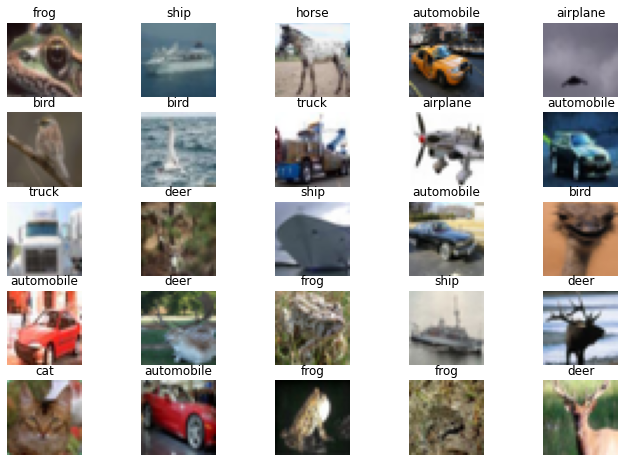

In [36]:
f, ax = plt.subplots(5,5)
f.subplots_adjust(0,0,1.5,1.5)
for i in range(0,5,1):
  for j in range(0,5,1):
    rnd_number = randint(0,len(X_train_raw))
    ax[i,j].imshow(X_train_raw[rnd_number], cmap=plt.cm.binary)
    ax[i,j].set_title(class_names[int(y_train_raw[rnd_number])])
    ax[i,j].axis('off')

# Pré-processamento dos Dados

In [37]:
X_train, X_val, y_train, y_val = train_test_split(
     X_train_raw, y_train_raw, stratify=y_train_raw, test_size=0.20, random_state=42)

In [38]:
X_train = X_train/255
X_val = X_val/255

In [39]:
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1,1)).toarray()
y_val = hot.transform(y_val.reshape(-1,1)).toarray()

Distribuição das classes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


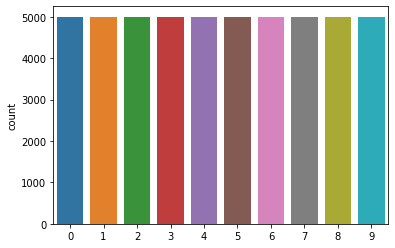

In [40]:
import seaborn as sns
sns.countplot(y_train_raw.flatten());

# Modelo CNN

Carregando as Bibliotecas

In [41]:
from tensorflow.python.keras.layers import Input, Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.callbacks import EarlyStopping

Definição da Arquitetura

In [42]:
rede = Sequential()
rede.add(Conv2D(25, (3,3), activation='relu', input_shape=(32,32,3), padding="same"))
rede.add(Conv2D(50, (5,5), activation='relu', padding="same"))
rede.add(MaxPooling2D())
rede.add(Conv2D(30, (3,3), activation='relu', padding="same"))
rede.add(Dropout(0.5))
rede.add(Conv2D(60, (5,5), activation='relu', padding="same"))
rede.add(MaxPooling2D())
rede.add(Conv2D(20, (3,3), activation='relu', padding="same"))
rede.add(Dropout(0.5))
rede.add(Conv2D(40, (5,5), activation='relu', padding="same"))
rede.add(Flatten())
rede.add(Dense(10))
rede.add(Activation('softmax'))

rede.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 25)        700       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 50)        31300     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 50)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 30)        13530     
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 30)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 60)        45060     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 60)         

In [43]:
rede.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', 
            metrics=['accuracy'])

In [44]:
es = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 8)

Treinando o Modelo

In [45]:
hist = rede.fit(X_train, 
                y_train, 
                epochs = 50,
                batch_size=64,
                verbose = 1,
                validation_data = (X_val, y_val),
                callbacks=[es])

Epoch 1/50
625/625 [==============================] - 18s 27ms/step - loss: 1.7623 - accuracy: 0.3474 - val_loss: 1.4855 - val_accuracy: 0.4587
Epoch 2/50
625/625 [==============================] - 16s 26ms/step - loss: 1.3607 - accuracy: 0.5066 - val_loss: 1.2313 - val_accuracy: 0.5579
Epoch 3/50
625/625 [==============================] - 16s 26ms/step - loss: 1.1926 - accuracy: 0.5719 - val_loss: 1.1069 - val_accuracy: 0.6080
Epoch 4/50
625/625 [==============================] - 16s 26ms/step - loss: 1.0709 - accuracy: 0.6157 - val_loss: 1.0222 - val_accuracy: 0.6369
Epoch 5/50
625/625 [==============================] - 16s 26ms/step - loss: 0.9945 - accuracy: 0.6455 - val_loss: 1.0023 - val_accuracy: 0.6446
Epoch 6/50
625/625 [==============================] - 17s 27ms/step - loss: 0.9258 - accuracy: 0.6691 - val_loss: 0.9111 - val_accuracy: 0.6788
Epoch 7/50
625/625 [==============================] - 17s 27ms/step - loss: 0.8825 - accuracy: 0.6863 - val_loss: 0.8566 - val_accuracy:

Avaliação do Modelo

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = rede.predict(X_val)
print(accuracy_score(y_val.argmax(1), y_pred.argmax(1)))

0.7491


In [53]:
print(confusion_matrix(y_val.argmax(1), y_pred.argmax(1)))

[[686  12  62  29  34   9  23  19 108  18]
 [  4 876   7  11   0   4  16   3  34  45]
 [ 47   0 632  60 101  58  73  10  17   2]
 [ 17   3  49 601  73 166  69  14   7   1]
 [ 13   3  34  51 803  25  40  22   7   2]
 [  2   1  44 168  61 677  20  22   5   0]
 [  3   1  29  57  30  16 853   4   7   0]
 [  6   0  32  65 144  78  12 654   3   6]
 [ 24  22   9  15   7   3  15   2 894   9]
 [ 20  74   4  30   6   8  14   5  24 815]]


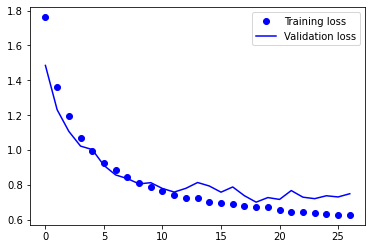

In [48]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()

# Avaliação do Modelo com os Dados de Teste

In [49]:
X_test = X_test_raw / 255
y_test = hot.transform(y_test_raw.reshape(-1,1)).toarray()

In [54]:
pred = rede.predict(X_test)
print(accuracy_score(y_test.argmax(1), pred.argmax(1)))

0.7473
